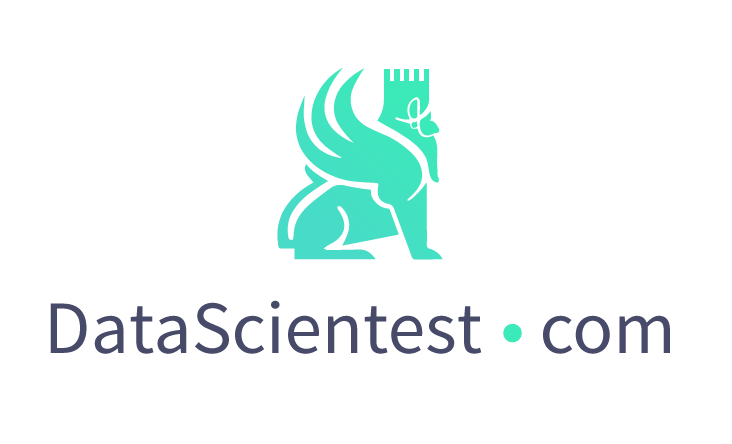

L’objectif de ce projet est d’essayer de battre les algorithmes des bookmakers sur l’estimation de la probabilité d’une équipe gagnant un match.
On se focalise sur le championnat anglais de football de premiere division et sur les saisons 2014-2015 jusque 2017-2018.

Sources:
1.   Statistiques Matches et Joueurs
*   Source: [ici](https://www.kaggle.com/shubhmamp/english-premier-league-match-data)
*   Data: Pour chaque match statistiques des equipes et également statistiques des joueurs.
*   Format: json – 2 fichiers /saison, stats generales et détails des matchs (joueurs)


2.   Cotes des bookmakers
*   Source: [ici](https://datahub.io/sports-data/english-premier-league#readme)
*   Data: Cotes des bookmakers pour plusieurs championnats dont la Premier League de 2009-2010 jusque 2018-2019
*   Descriptions des variables: [ici](http://www.football-data.co.uk/notes.txt)
*   Format: json (ou csv) – 1 fichier /saison


# 1. Données équipes par match

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Uploader le kaggle.json préalablement récupéré
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thomasmiras","key":"7b45a7acc95b0c1e369d73539f048cbf"}'}

In [3]:
# Créer un dossier kaggle
! mkdir ~/.kaggle
# Copie le fichier kaggle.json dans le dossier kaggle
! cp kaggle.json ~/.kaggle/
# Change les permisions du fichier kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Données kaggle https://www.kaggle.com/shubhmamp/english-premier-league-match-data
! kaggle datasets download -d shubhmamp/english-premier-league-match-data

 90% 5.00M/5.57M [00:00<00:00, 27.1MB/s]
100% 5.57M/5.57M [00:00<00:00, 27.2MB/s]


In [5]:
# Creation d'un folder dataset (si celui ci existe déjà, changer le nom dataset ou ignorer cette cellule si ce sont les mêmes données)
# dans le drive, et extraction des données
! mkdir '/content/drive/My Drive/dataset'
! unzip english-premier-league-match-data.zip -d '/content/drive/My Drive/dataset'

mkdir: cannot create directory ‘/content/drive/My Drive/dataset’: File exists
Archive:  english-premier-league-match-data.zip
replace /content/drive/My Drive/dataset/datafile/season14-15/season_match_stats.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/My Drive/dataset/datafile/season14-15/season_match_stats.json  
  inflating: /content/drive/My Drive/dataset/datafile/season14-15/season_stats.json  
  inflating: /content/drive/My Drive/dataset/datafile/season15-16/season_match_stats.json  
  inflating: /content/drive/My Drive/dataset/datafile/season15-16/season_stats.json  
  inflating: /content/drive/My Drive/dataset/datafile/season16-17/season_match_stats.json  
  inflating: /content/drive/My Drive/dataset/datafile/season16-17/season_stats.json  
  inflating: /content/drive/My Drive/dataset/datafile/season17-18/season_match_stats.json  
  inflating: /content/drive/My Drive/dataset/datafile/season17-18/season_stats.json  
  inflating: /content/drive/My Drive

In [6]:
import json
import pandas as pd
import numpy as np

In [7]:
team_stats_14_15_json = json.load(open('/content/drive/My Drive/dataset/datafilev2/datafile/season14-15/season_stats.json'))
team_stats_15_16_json = json.load(open('/content/drive/My Drive/dataset/datafilev2/datafile/season15-16/season_stats.json'))
team_stats_16_17_json = json.load(open('/content/drive/My Drive/dataset/datafilev2/datafile/season16-17/season_stats.json'))
team_stats_17_18_json = json.load(open('/content/drive/My Drive/dataset/datafilev2/datafile/season17-18/season_stats.json'))

match_stats_14_15_json = json.load(open('/content/drive/My Drive/dataset/datafilev2/datafile/season14-15/season_match_stats.json'))
match_stats_15_16_json = json.load(open('/content/drive/My Drive/dataset/datafilev2/datafile/season15-16/season_match_stats.json'))
match_stats_16_17_json = json.load(open('/content/drive/My Drive/dataset/datafilev2/datafile/season16-17/season_match_stats.json'))
match_stats_17_18_json = json.load(open('/content/drive/My Drive/dataset/datafilev2/datafile/season17-18/season_match_stats.json'))

In [8]:
def team_stats(json,teamloc):
  
  # Les données de la team home seront disponibles à la posittion 0 et celles de la team away à la position 1
  # si l'argument teamloc n'est pas fourni, la fonction ne s'exécutera pas
  teamidx = 0 if teamloc == 'home' else 1 if teamloc == 'away' else "null"
  stats = pd.DataFrame()

  row=0

  # Iteration dans les items du json
  for match_id, infos_match in json.items():
      stats.loc[row, 'match_id'] = match_id
      
      team = dict(list(infos_match.values())[teamidx])

      for column, team_info in team['team_details'].items():
          stats.loc[row, column] = team_info
      
      for column, team_stat in team['aggregate_stats'].items():
          stats.loc[row, column] = team_stat
      

      row += 1
  
  stats['date'] = pd.to_datetime(stats['date'], dayfirst=True)
  stats = stats.sort_values(by=['date', 'match_id'])
  stats = stats.reset_index(drop=True)
  
  stats['team_rating'] = stats['team_rating'].astype(float)
  
  for column in stats.columns[5:]:
      stats[column] = stats[column].astype(float)
  
  return stats


In [9]:
def match_stats(json):
    stats = pd.DataFrame()
    
    stats = pd.DataFrame.from_dict(json, orient='index')
    
    return stats

In [10]:
team_stats_home = {'season_14_15': team_stats(team_stats_14_15_json,'home').add_prefix('home_'), 
                   'season_15_16': team_stats(team_stats_15_16_json,'home').add_prefix('home_'), 
                   'season_16_17': team_stats(team_stats_16_17_json,'home').add_prefix('home_'),  
                   'season_17_18': team_stats(team_stats_17_18_json,'home').add_prefix('home_')}

team_stats_away = {'season_14_15': team_stats(team_stats_14_15_json,'away').add_prefix('away_'), 
                   'season_15_16': team_stats(team_stats_15_16_json,'away').add_prefix('away_'), 
                   'season_16_17': team_stats(team_stats_16_17_json,'away').add_prefix('away_'),  
                   'season_17_18': team_stats(team_stats_17_18_json,'away').add_prefix('away_')}

match_results = {'season_14_15': match_stats(match_stats_14_15_json), 
                 'season_15_16': match_stats(match_stats_15_16_json), 
                 'season_16_17': match_stats(match_stats_16_17_json),  
                 'season_17_18': match_stats(match_stats_17_18_json)}

In [11]:
# Ajout de la saison des données home
team_stats_home['season_14_15']['season'] = '2014_2015'
team_stats_home['season_15_16']['season'] = '2015_2016'
team_stats_home['season_16_17']['season'] = '2016_2017'
team_stats_home['season_17_18']['season'] = '2017_2018'

In [12]:
# Concatenation pour toutes les données home
df_home = pd.concat([team_stats_home['season_14_15'],team_stats_home['season_15_16'],team_stats_home['season_16_17'],team_stats_home['season_17_18']])

# Concatenation pour toutes les données away
df_away = pd.concat([team_stats_away['season_14_15'],team_stats_away['season_15_16'],team_stats_away['season_16_17'],team_stats_away['season_17_18']])

# Concatenation pour toutes les données match
df_match = pd.concat([match_results['season_14_15'],match_results['season_15_16'],match_results['season_16_17'],match_results['season_17_18']])

In [13]:
# Concatenation away / home
df_merge = df_home.merge(df_away, left_on=['home_match_id'], right_on=['away_match_id'])

In [14]:
#df_merge.info()
#df_match.info()
#df_match.head()
df_merge.head()

,home_match_id,home_team_id,home_team_name,home_team_rating,home_date,home_att_goal_low_left,home_won_contest,home_possession_percentage,home_total_throws,home_att_miss_high_left,home_blocked_scoring_att,home_total_scoring_att,home_att_sv_low_left,home_total_tackle,home_att_miss_high_right,home_aerial_won,home_att_miss_right,home_att_sv_low_centre,home_aerial_lost,home_accurate_pass,home_total_pass,home_won_corners,home_shot_off_target,home_ontarget_scoring_att,home_goals,home_att_miss_left,home_fk_foul_lost,home_att_sv_low_right,home_att_goal_low_centre,home_att_sv_high_left,home_total_offside,home_att_goal_high_left,home_att_goal_low_right,home_att_miss_high,home_att_sv_high_centre,home_att_post_high,home_post_scoring_att,home_att_sv_high_right,home_att_pen_goal,home_att_post_right,...,away_date,away_won_corners,away_fk_foul_lost,away_won_contest,away_total_tackle,away_aerial_lost,away_possession_percentage,away_att_goal_low_left,away_total_pass,away_total_throws,away_total_offside,away_blocked_scoring_att,away_ontarget_scoring_att,away_aerial_won,away_accurate_pass,away_total_scoring_att,away_att_sv_low_left,away_goals,away_att_miss_high_right,away_att_miss_right,away_shot_off_target,away_att_miss_left,away_att_miss_high,away_att_goal_low_centre,away_att_goal_high_right,away_att_miss_high_left,away_att_sv_low_centre,away_att_goal_high_left,away_att_sv_high_centre,away_att_goal_low_right,away_att_sv_high_right,away_att_sv_high_left,away_penalty_save,away_att_sv_low_right,away_post_scoring_att,away_att_post_high,away_att_post_left,away_att_pen_goal,away_att_goal_high_centre,away_att_post_right
0,829513,13,Arsenal,7.015000,2014-08-16,1.0,12.0,76.0,21.0,1.0,3.0,14.0,2.0,26.0,1.0,23.0,1.0,1.0,17.0,640.0,730.0,9.0,5.0,6.0,2.0,2.0,13.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2014-08-16,3.0,19.0,7.0,33.0,23.0,24.0,1.0,222.0,18.0,1.0,2.0,2.0,17.0,127.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,829515,14,Leicester,6.714286,2014-08-16,NaN,6.0,36.7,12.0,NaN,3.0,11.0,NaN,13.0,NaN,27.0,2.0,NaN,14.0,265.0,344.0,3.0,5.0,3.0,2.0,1.0,16.0,1.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2014-08-16,6.0,10.0,9.0,19.0,27.0,63.3,NaN,605.0,17.0,NaN,5.0,3.0,14.0,509.0,13.0,NaN,2.0,NaN,1.0,5.0,2.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,829517,32,Manchester United,6.707143,2014-08-16,1.0,13.0,59.6,29.0,NaN,4.0,14.0,1.0,13.0,NaN,20.0,1.0,3.0,10.0,482.0,558.0,4.0,5.0,5.0,1.0,2.0,14.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,...,2014-08-16,NaN,20.0,4.0,19.0,20.0,40.4,NaN,383.0,23.0,1.0,1.0,4.0,10.0,307.0,5.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,829519,171,Queens Park Rangers,6.715000,2014-08-16,NaN,8.0,51.0,22.0,NaN,6.0,19.0,1.0,14.0,NaN,30.0,5.0,3.0,15.0,296.0,383.0,8.0,7.0,6.0,NaN,2.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,2014-08-16,9.0,10.0,4.0,17.0,30.0,49.0,1.0,382.0,26.0,2.0,4.0,4.0,15.0,289.0,11.0,NaN,1.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,829520,96,Stoke,6.799231,2014-08-16,NaN,9.0,63.1,36.0,NaN,6.0,12.0,2.0,27.0,NaN,30.0,1.0,NaN,9.0,432.0,517.0,2.0,4.0,2.0,NaN,2.0,14.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2014-08-16,8.0,9.0,4.0,19.0,30.0,36.9,1.0,289.0,35.0,1.0,2.0,1.0,9.0,197.0,7.0,NaN,1.0,NaN,NaN,4.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Récupération de l'heure dans les données match et fusion des df de_match & df_merge
df_match['date'] = df_match['date_string'].apply(lambda x: x.split(' ')[0])
df_match['date'] = pd.to_datetime(df_match['date'], dayfirst=True)
df_match['time'] = df_match['date_string'].apply(lambda x: x.split(' ')[1])
df_match = df_match[['home_team_id','away_team_id','date','time']]

df_merge = df_merge.rename(columns={"home_match_id": "match_id", "home_date": "date"})
df_merge = df_merge.merge(df_match, left_on = ['home_team_id','away_team_id','date'], right_on=['home_team_id','away_team_id','date'])

In [16]:
# Les NaN dans le dataset sont équivalents à 0
#df_merge.info()
df_merge = df_merge.fillna(0)

In [17]:
df_merge = df_merge.drop(['away_match_id','away_date','home_goals','away_goals'], axis=1)

# 2. Cotes par match

In [18]:
! pip install datapackage

     |████████████████████████████████| 85 kB 3.6 MB/s 
     |████████████████████████████████| 68 kB 6.1 MB/s 
     |████████████████████████████████| 72 kB 516 kB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 242 kB 58.7 MB/s 
     |████████████████████████████████| 126 kB 32.4 MB/s 
     |████████████████████████████████| 131 kB 44.0 MB/s 
     |████████████████████████████████| 8.0 MB 35.5 MB/s 
     |████████████████████████████████| 79 kB 6.7 MB/s 
     |████████████████████████████████| 127 kB 57.8 MB/s 
  Created wheel for linear-tsv: filename=linear_tsv-1.1.0-py3-none-any.whl size=7399 sha256=473cd4eaa77a57b826cbd6ad2141e49f3ad358f2a2356cd3316d18325931642f
  Stored in directory: /root/.cache/pip/wheels/dd/0a/62/49ee84fab92057fb3e303fb1a59e75ccac6899b417f441305a
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10765 sha256=f7b5c7abcc874c9b33d6c18cab5f6b6a3baaea5c7ba34f24c3595ab16cc5c148
  Store

In [19]:
import datapackage

In [20]:
data_url = 'https://datahub.io/sports-data/english-premier-league/datapackage.json'
package = datapackage.Package(data_url)
resources = package.resources

cotes_1415 = pd.read_csv(resources[5].descriptor['path'])
cotes_1516 = pd.read_csv(resources[4].descriptor['path'])
cotes_1617 = pd.read_csv(resources[3].descriptor['path']) 
cotes_1718 = pd.read_csv(resources[2].descriptor['path']) 

In [21]:
df_cotes = pd.concat([cotes_1415, cotes_1516, cotes_1617, cotes_1718])

In [22]:
# Traitement de la date
df_cotes['date'] = df_cotes['Date'].apply(lambda x: pd.to_datetime(x, dayfirst=True))
df_cotes = df_cotes.drop(['Date'], axis=1)

In [23]:
# Remplacement des noms des équipes qui ne sont pas les mêmes dans les deux datasets

old_names = sorted(df_cotes['HomeTeam'].unique())
new_names = sorted(df_merge['home_team_name'].unique())

#print(old_names)
#print(new_names)
df_cotes['HomeTeam'] = df_cotes['HomeTeam'].replace(old_names, new_names)
df_cotes['AwayTeam'] = df_cotes['AwayTeam'].replace(old_names, new_names)

In [24]:
# Supprimer toutes les colonnes de cotes pour lesquelles il y a des valeur nulles
df_cotes = df_cotes.dropna(axis='columns')

In [25]:
# Supprimer les variables redondantes avec df_merge
# HS/AS = tirs, HST/AST = tirs cadrés, HC/AC car on garde la variable won_corners
# Suppression également de la variable Div qui concerne la division car identique
df_cotes = df_cotes.drop(['Div','HS','AS','HST','AST','HC', 'AC'], axis=1)

# 3. Jointure données matches et cotes

In [26]:
df_stats_cotes = df_merge.merge(df_cotes, left_on = ['date', 'home_team_name', 'away_team_name'], right_on = ['date', 'HomeTeam', 'AwayTeam'])

In [27]:
# Suppression redondances
df_stats_cotes = df_stats_cotes.drop(['HomeTeam','AwayTeam'], axis=1)

In [28]:
df_stats_cotes[['match_id','home_team_id','away_team_id']] =  df_stats_cotes[['match_id','home_team_id','away_team_id']].astype(int) 

In [29]:
df_stats_cotes  = df_stats_cotes .drop(['time','Referee'], axis=1)

# 4. Données joueurs par match

Pour chaque joueurs participant à un match, on vient récuperer ses statistiques et les regrouper (en faisant une moyenne) par poste (Défenseur, milieux, attaquant, etc). Cela permet d'avoir une donnée plus fine qu'une note globale de l'équipe.

In [30]:
def players_stats(json, teamloc):
    
    IsAway = 0 if teamloc == 'home' else 1 if teamloc == 'away' else None

    stats = pd.DataFrame()
   
    row = 0
    for match_id, infos_match in json.items():
        
        home = dict(list(infos_match.values())[IsAway])
        for column, player_stat in home['Player_stats'].items():
            stats.loc[row, 'season'] = None
            stats.loc[row, 'match_id'] = match_id
            for column1, player_details in home['Player_stats'][column]['player_details'].items():
              stats.loc[row, column1] = player_details
            for column1, match_details in home['Player_stats'][column]['Match_stats'].items():
              stats.loc[row, column1] = match_details

            row+=1
    
    stats = stats.sort_values(by=['match_id'])
    stats = stats.reset_index(drop=True)

    for column in stats.columns[6:]:
        stats[column] = stats[column].astype(float)
    
    return stats

In [31]:
players_stats_home = {'season_14_15': players_stats(team_stats_14_15_json, 'home').add_prefix('home_'), 
                      'season_15_16': players_stats(team_stats_15_16_json, 'home').add_prefix('home_'), 
                      'season_16_17': players_stats(team_stats_16_17_json, 'home').add_prefix('home_'),  
                      'season_17_18': players_stats(team_stats_17_18_json, 'home').add_prefix('home_')}

players_stats_away = {'season_14_15': players_stats(team_stats_14_15_json, 'away').add_prefix('away_'), 
                      'season_15_16': players_stats(team_stats_15_16_json, 'away').add_prefix('away_'), 
                      'season_16_17': players_stats(team_stats_16_17_json, 'away').add_prefix('away_'),  
                      'season_17_18': players_stats(team_stats_17_18_json, 'away').add_prefix('away_')}

In [32]:
# concatenation pour toutes les données home
df_players_home = pd.concat([players_stats_home['season_14_15'], players_stats_home['season_15_16'], players_stats_home['season_16_17'], players_stats_home['season_17_18']])

# concatenation pour toutes les données away
df_players_away = pd.concat([players_stats_away['season_14_15'], players_stats_away['season_15_16'], players_stats_away['season_16_17'], players_stats_away['season_17_18']])

In [33]:
# on ne conserve que les joueurs qui ont une note
df_players_home_rated = df_players_home.loc[df_players_home['home_player_rating'] > 0,:]
df_players_away_rated = df_players_away.loc[df_players_away['away_player_rating'] > 0,:]

In [34]:
# concatenation pour toutes les données home
df_players_home_rated = df_players_home_rated.rename(columns={"home_match_id": "match_id"})

# concatenation pour toutes les données away
df_players_away_rated = df_players_away_rated.rename(columns={"away_match_id": "match_id"})

In [35]:
# regroupement par poste
df_players_home_rated['home_player_position'] = df_players_home_rated['home_player_position_value']
df_players_home_rated['home_player_position'].replace(['1', '2', '3', '4', '5'], ['Goalkeeper', 'Defender', 'Midfielder', 'Forward', 'Substitute'], inplace = True)

df_players_away_rated['away_player_position'] = df_players_away_rated['away_player_position_value']
df_players_away_rated['away_player_position'].replace(['1', '2', '3', '4', '5'], ['Goalkeeper', 'Defender', 'Midfielder', 'Forward', 'Substitute'], inplace = True)

In [36]:
def position_rating(teamloc):
  
  output = pd.DataFrame()
  position_list = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward', 'Substitute']

  if teamloc == 'home':
    df = pd.DataFrame(df_players_home_rated.groupby(['match_id', teamloc + '_player_position']).mean()[teamloc + '_player_rating'].reset_index())
  elif teamloc == 'away':
    df = pd.DataFrame(df_players_away_rated.groupby(['match_id', teamloc + '_player_position']).mean()[teamloc + '_player_rating'].reset_index())
  
  df.index = df['match_id']

  for position in position_list:
    output = pd.concat([output, df.loc[df[teamloc + '_player_position'] == position,:]], axis = 1)
    output = output.rename(columns = {teamloc + '_player_rating':position.lower() + str('_') + teamloc + '_player_rating'})
    output = output.drop(['match_id', teamloc + '_player_position'], axis = 1)

  output = output.reset_index()
  output = output.rename(columns = {'index':'match_id'})

  return output

df_position_home = position_rating('home')

In [37]:
# Creationd es dataframe de notes
df_position_home_rating = position_rating('home')
df_position_away_rating = position_rating('away')

df_position_rating = df_position_home_rating.merge(df_position_away_rating, on = ['match_id'])
df_position_rating['match_id'] = df_position_rating['match_id'].astype(int)

# On fusionne le dataframe avec les données precedentes
df_stats_cotes = df_stats_cotes.merge(df_position_rating, on = ['match_id'])

# Suppression de la catégorie Substitute, on considere que les remplaçants ne vont pas être impactant
df_stats_cotes = df_stats_cotes.drop(columns=['substitute_away_player_rating', 'substitute_home_player_rating']) 
# Il peut arriver qu'une équipe joue sans attaquant, on attribu alors une note à 0
df_stats_cotes['forward_away_player_rating'] = df_stats_cotes['forward_away_player_rating'].fillna(0)

In [38]:
df_stats_cotes.head()

,match_id,home_team_id,home_team_name,home_team_rating,date,home_att_goal_low_left,home_won_contest,home_possession_percentage,home_total_throws,home_att_miss_high_left,home_blocked_scoring_att,home_total_scoring_att,home_att_sv_low_left,home_total_tackle,home_att_miss_high_right,home_aerial_won,home_att_miss_right,home_att_sv_low_centre,home_aerial_lost,home_accurate_pass,home_total_pass,home_won_corners,home_shot_off_target,home_ontarget_scoring_att,home_att_miss_left,home_fk_foul_lost,home_att_sv_low_right,home_att_goal_low_centre,home_att_sv_high_left,home_total_offside,home_att_goal_high_left,home_att_goal_low_right,home_att_miss_high,home_att_sv_high_centre,home_att_post_high,home_post_scoring_att,home_att_sv_high_right,home_att_pen_goal,home_att_post_right,home_att_goal_high_right,...,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,goalkeeper_home_player_rating,defender_home_player_rating,midfielder_home_player_rating,forward_home_player_rating,goalkeeper_away_player_rating,defender_away_player_rating,midfielder_away_player_rating,forward_away_player_rating
0,829513,13,Arsenal,7.015000,2014-08-16,1.0,12.0,76.0,21.0,1.0,3.0,14.0,2.0,26.0,1.0,23.0,1.0,1.0,17.0,640.0,730.0,9.0,5.0,6.0,2.0,13.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.00,13.00,1.26,6.45,14.01,1.25,5.5,12.0,1.25,6.25,10.50,50,1.30,1.25,6.70,5.96,16.00,12.43,48,1.77,1.72,2.26,2.10,24,-1.50,1.81,1.78,2.20,2.10,1.29,5.90,12.75,5.81,7.277500,7.556,6.420,6.26,6.950000,6.8125,6.825
1,829515,14,Leicester,6.714286,2014-08-16,0.0,6.0,36.7,12.0,0.0,3.0,11.0,0.0,13.0,0.0,27.0,2.0,0.0,14.0,265.0,344.0,3.0,5.0,3.0,1.0,16.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.40,2.25,3.14,3.38,2.46,3.10,3.1,2.4,3.20,3.40,2.40,50,3.30,3.06,3.45,3.32,2.42,2.36,48,2.10,2.00,1.90,1.80,22,0.25,1.88,1.85,2.10,2.02,3.11,3.40,2.47,6.39,6.937500,6.520,7.005,6.03,6.560000,7.0600,6.320
2,829517,32,Manchester United,6.707143,2014-08-16,1.0,13.0,59.6,29.0,0.0,4.0,14.0,1.0,13.0,0.0,20.0,1.0,3.0,10.0,482.0,558.0,4.0,5.0,5.0,2.0,14.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,5.00,10.00,1.37,5.10,10.60,1.36,4.5,9.0,1.36,5.20,10.00,50,1.38,1.34,5.50,4.96,11.03,9.32,48,1.77,1.71,2.30,2.13,25,-1.50,2.18,2.08,1.87,1.79,1.45,4.81,8.25,5.79,7.076667,6.550,7.050,7.34,6.785000,7.2560,6.500
3,829519,171,Queens Park Rangers,6.715000,2014-08-16,0.0,8.0,51.0,22.0,0.0,6.0,19.0,1.0,14.0,0.0,30.0,5.0,3.0,15.0,296.0,383.0,8.0,7.0,6.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.25,3.10,2.48,3.26,3.22,2.60,3.0,2.9,2.55,3.20,3.12,50,2.60,2.47,3.40,3.18,3.20,3.02,46,2.52,2.36,1.65,1.58,24,0.00,1.80,1.73,2.25,2.14,2.31,3.24,3.59,6.88,7.096667,6.776,6.655,8.92,8.013333,7.2775,6.330
4,829520,96,Stoke,6.799231,2014-08-16,0.0,9.0,63.1,36.0,0.0,6.0,12.0,2.0,27.0,0.0,30.0,1.0,0.0,9.0,432.0,517.0,2.0,4.0,2.0,2.0,14.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.40,4.20,1.95,3.47,4.55,1.95,3.2,4.2,1.95,3.30,4.75,50,2.00,1.92,3.50,3.38,4.80,4.27,44,2.42,2.31,1.67,1.60,23,-0.50,1.95,1.91,2.02,1.96,2.01,3.34,4.51,5.73,7.450000,6.770,6.590,6.30,7.087500,6.9820,6.200


# 5. Pre-Processing



#### 1. Suppression variables inutiles

Après une première observation des données, les variables suivantes ne semblent pas pertinentes

* Supprimer: att_goal_low_left / att_goal_low_centre / att_goal_high_left / att_goal_low_right / att_goal_high_right / att_goal_high_centre 
* Supprimer: att_miss_high_left / att_miss_high_right / att_miss_right / att_miss_left / att_miss_high /  (tirs non cadres) 
* Supprimer: att_sv_low_left / att_sv_low_centre / att_sv_low_right / att_sv_high_left / att_sv_high_centre / att_sv_high_right (tirs arretés) 
* Supprimer: att_post_high / att_post_right / att_post_left
* Supprimer: away_fk_foul_lost, redondance avec HF / AF


In [39]:
df_stats_cotes = df_stats_cotes.drop(['home_att_goal_low_left','home_att_goal_low_centre','home_att_goal_high_left','home_att_goal_low_right','home_att_goal_high_right','home_att_goal_high_centre'],axis=1)

In [40]:
df_stats_cotes = df_stats_cotes.drop(['away_att_goal_low_left','away_att_goal_low_centre','away_att_goal_high_left','away_att_goal_low_right','away_att_goal_high_right','away_att_goal_high_centre'],axis=1)

In [41]:
df_stats_cotes = df_stats_cotes.drop(['home_att_miss_high_left','home_att_miss_high_right','home_att_miss_right','home_att_miss_left','home_att_miss_high'],axis=1)

In [42]:
df_stats_cotes = df_stats_cotes.drop(['away_att_miss_high_left','away_att_miss_high_right','away_att_miss_right','away_att_miss_left','away_att_miss_high'],axis=1)

In [43]:
df_stats_cotes = df_stats_cotes.drop(['home_att_sv_low_left','home_att_sv_low_centre','home_att_sv_low_right','home_att_sv_high_left','home_att_sv_high_centre','home_att_sv_high_right'],axis=1)

In [44]:
df_stats_cotes = df_stats_cotes.drop(['away_att_sv_low_left','away_att_sv_low_centre','away_att_sv_low_right','away_att_sv_high_left','away_att_sv_high_centre','away_att_sv_high_right'],axis=1)

In [45]:
df_stats_cotes = df_stats_cotes.drop(['home_att_post_high','home_att_post_right','home_att_post_left'],axis=1)

In [46]:
df_stats_cotes = df_stats_cotes.drop(['away_att_post_high','away_att_post_right','away_att_post_left'],axis=1)

In [47]:
df_stats_cotes = df_stats_cotes.drop(['home_fk_foul_lost','away_fk_foul_lost'],axis=1)

#### 2. Combiner accurate_pass / total_pass (Faire le rapport entre les deux)

In [48]:
df_stats_cotes['home_pass'] =  df_stats_cotes['home_accurate_pass'] / df_stats_cotes['home_total_pass']

In [49]:
df_stats_cotes['away_pass'] =  df_stats_cotes['away_accurate_pass'] / df_stats_cotes['away_total_pass']

#### 3. Suppression cotes non exploitables ou non pertinentes dans le cadre de l'analyse envisagée

In [50]:
# bases de calcul
df_stats_cotes = df_stats_cotes.drop(['Bb1X2','BbOU','BbAH'],axis=1)

In [51]:
# cotes min/max/moyenne/handicap asiatique/nb de goals
df_stats_cotes = df_stats_cotes.drop(['BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA','BbAv>2.5','BbAv<2.5','BbAHh','BbMxAHH','BbAvAHH','BbMxAHA','BbAvAHA'],axis=1)


#### 4. Récupération des données passées

In [52]:
# Renommage du df pour simplifier ensuite
df = df_stats_cotes.copy()

In [53]:
# transformation de certaines données
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [54]:
# sélection d'un match
print(df.groupby(['season']).min()['match_id'])
print(df.groupby(['season']).max()['match_id'])

season
2014_2015     829513
2015_2016     958426
2016_2017    1080506
2017_2018    1190174
Name: match_id, dtype: int64
season
2014_2015     829892
2015_2016     959908
2016_2017    1080885
2017_2018    1190553
Name: match_id, dtype: int64


In [55]:
def previous_results(id, n):

  df_home_last_home_results = pd.DataFrame()
  df_home_last_results = pd.DataFrame()
  df_away_last_away_results = pd.DataFrame()
  df_away_last_results = pd.DataFrame()
  df_last_results = pd.DataFrame()

  # récupération du nom des équipes
  home = list(df[df['match_id'] == id]['home_team_name'])[0]
  away = list(df[df['match_id'] == id]['away_team_name'])[0]
  date = list(df[df['match_id'] == id]['date'])[0]

  #création des dataframes home
  df_home_last_home_results = df[(df['home_team_name'] == home) & (df['date'] < date)][:]
  df_home_last_results = df[((df['home_team_name'] == home) | (df['away_team_name'] == home)) & (df['date'] < date)][:]

  #création des dataframes away
  df_away_last_away_results = df[(df['away_team_name'] == away) & (df['date'] < date)][:]
  df_away_last_results = df[((df['home_team_name'] == away) | (df['away_team_name'] == away)) & (df['date'] < date)][:]

  #création des dataframes confrontation
  df_last_results = df[(((df['home_team_name'] == home) & (df['away_team_name'] == away)) | ((df['home_team_name'] == away) & (df['away_team_name'] == home))) & (df['date'] < date)][:]

  #selection des n derniers matchs (pour home_last_results et away_last_results seulement)
  df_home_last_home_results = df_home_last_home_results.sort_values(by = ['date'], ascending = False)
  df_home_last_results = df_home_last_results.sort_values(by = ['date'], ascending = False)
  df_away_last_away_results = df_away_last_away_results.sort_values(by = ['date'], ascending = False)
  df_away_last_results = df_away_last_results.sort_values(by = ['date'], ascending = False)
  df_last_results = df_last_results.sort_values(by = ['date'], ascending = False)

  if len(df_home_last_home_results) < n:
    df_home_last_home_results = df_home_last_home_results
  else:
    df_home_last_home_results = df_home_last_home_results[0:n]

  if len(df_home_last_results) < n:
    df_home_last_results = df_home_last_results
  else:
    df_home_last_results = df_home_last_results[0:n]

  if len(df_away_last_away_results) < n:
    df_away_last_away_results = df_away_last_away_results
  else:
    df_away_last_away_results = df_away_last_away_results[0:n]
  
  if len(df_away_last_results) < n:
    df_away_last_results = df_away_last_results
  else:
    df_away_last_results = df_away_last_results[0:n]
  
  if len(df_last_results) < n:
    df_last_results  =df_last_results
  else:
    df_last_results = df_last_results[0:n]

  return df_home_last_home_results, df_home_last_results, df_away_last_away_results, df_away_last_results, df_last_results

In [56]:
# Reorganisation des variables: 
# d'abord variables info, ensuite feats en distinguant home et away, ensuite variables de type target), le résultat mi temps (HTR) est supprimé car non utilisé, ainsi que le nombres de goals mi temps (HTAG-HTHG)
# utilisé, il faudrait peut être supprimer aussi les nombres de goals mi temps
df = df[['match_id', 'season', 'date', 'away_team_id', 'away_team_name',
       'home_team_id', 'home_team_name',
       # feats home
       'home_team_rating','home_won_contest', 'home_possession_percentage', 'home_total_throws',
       'home_blocked_scoring_att', 'home_total_scoring_att',
       'home_total_tackle', 'home_aerial_won', 'home_aerial_lost',
       'home_accurate_pass', 'home_total_pass', 'home_won_corners',
       'home_shot_off_target', 'home_ontarget_scoring_att',
       'home_total_offside', 'home_post_scoring_att', 'home_att_pen_goal',
       'home_penalty_save', 'HF', 'HY','HR', 'home_pass', 'goalkeeper_home_player_rating',
       'defender_home_player_rating', 'midfielder_home_player_rating', 'forward_home_player_rating',
       # feats away
       'away_team_rating', 'away_won_contest', 'away_possession_percentage', 'away_total_throws',
       'away_blocked_scoring_att', 'away_total_scoring_att',
       'away_total_tackle', 'away_aerial_won', 'away_aerial_lost',
       'away_accurate_pass', 'away_total_pass', 'away_won_corners',  
        'away_shot_off_target', 'away_ontarget_scoring_att', 
       'away_total_offside', 'away_post_scoring_att', 'away_att_pen_goal',
        'away_penalty_save', 'AF',  'AY', 'AR', 'away_pass', 'goalkeeper_away_player_rating',
       'defender_away_player_rating', 'midfielder_away_player_rating', 'forward_away_player_rating',
       # target
       'FTHG', 'FTAG', 'FTR', 'B365H',
       'B365D', 'B365A', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH',
       'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA']]

In [57]:
# Instanciation du df qui comportera données matches précédents avec récultat match actuel
df_results = pd.DataFrame(columns=df.columns, index=df.index.values.tolist())

In [58]:
# Array qui regroupera les lignes non traitées pour cause de nb de matchs insuffisants pour faire les moyennes
index_non_traites = []

In [59]:
def add_prev_res(index,row,match_id,a,c):

  # On ne retient que les matches pour lesquels on a une visibilité sur les 3 précédents
  if (len(a) > 2 and len(c) > 2):
    
    results_home_mean = a[['home_team_rating','home_won_contest', 'home_possession_percentage', 'home_total_throws',
       'home_blocked_scoring_att', 'home_total_scoring_att',
       'home_total_tackle', 'home_aerial_won', 'home_aerial_lost',
       'home_accurate_pass', 'home_total_pass', 'home_won_corners',
       'home_shot_off_target', 'home_ontarget_scoring_att',
       'home_total_offside', 'home_post_scoring_att', 'home_att_pen_goal',
       'home_penalty_save', 'HF', 'HY','HR', 'home_pass', 'goalkeeper_home_player_rating',
       'defender_home_player_rating', 'midfielder_home_player_rating', 'forward_home_player_rating']].mean()

    # Récupération des features des 3 matches précédents away et calcul moyenne
    # il faudra ensuite rajouter ces moyennes à la place des variables de type features
    # dans le df_result nouvellement créé
   
    results_away_mean = c[['away_team_rating', 'away_won_contest', 'away_possession_percentage', 'away_total_throws',
       'away_blocked_scoring_att', 'away_total_scoring_att',
       'away_total_tackle', 'away_aerial_won', 'away_aerial_lost',
       'away_accurate_pass', 'away_total_pass', 'away_won_corners',  
        'away_shot_off_target', 'away_ontarget_scoring_att', 
       'away_total_offside', 'away_post_scoring_att', 'away_att_pen_goal',
        'away_penalty_save', 'AF',  'AY', 'AR', 'away_pass', 'goalkeeper_away_player_rating',
       'defender_away_player_rating', 'midfielder_away_player_rating', 'forward_away_player_rating']].mean()
  
    # Les variables de type informatif restent identiques, on les reporte ds df nouvellement créé
    # certaines lignes seront en nans (quand nb de matchs précédents non suffisants), mais les
    # index sont importants car les colonnes ne sont pas remplies en une seule fois, il faut donc
    # insérer au bon index, les lignes comportant des nans pourront par la suite être supprimées
    df_results.iloc[index,0:7] = row[0:7]

    # Insertion des moyennes home
    df_results.iloc[index,7:33] = results_home_mean
    
    # Insertion des moyennes away
    df_results.iloc[index,33:59] = results_away_mean

    # Ajout des variables de type target a partir du df initial

    df_results.iloc[index,59:80] = row[61:80]

    # S'il n'y a pas de nb de matchs suffisant sur les matchs antérieurs pr
    # calculer les moyennes, afficher le match id pr info. Ces matchs ne seront pas inclus dans le df
  else:
      index_non_traites.append(index)
      #print(index)
      #print('Nb de matchs antérieurs non suffisant')
      #print(f'Nb Résultats home: {len(a)}')
      #print(f'Nb Résultats away: {len(c)}')

In [60]:
for index, row in df.iterrows():
  match_id = row['match_id']
  a, b, c, d, e = previous_results(match_id, 3)
  add_prev_res(index,row,match_id,a,c)

In [61]:
# Nb de lignes non traitées
len(index_non_traites)

95

In [62]:
# Suppression des lignes non traitées
to_drop = df_results.index[index_non_traites]
df_results.drop(to_drop, inplace=True)

In [63]:
df_results.shape

(1425, 80)

#### 5. Sélection du meilleur bookmaker et du bookmaker sur lequel le pari est le plus interessant


In [64]:
# Best BOOKMAKER
#---------------------------------------------------------------------------------
def bookmaker_results(bookmaker_name, df):
  
  results = []

  for i in range(len(df[bookmaker_name + 'H'])):
    if df.loc[i, [bookmaker_name + 'H', bookmaker_name + 'D', bookmaker_name + 'A']].min() == df[bookmaker_name + 'H'][i]:
      results.append('H')
    elif df.loc[i, [bookmaker_name+'H', bookmaker_name + 'D', bookmaker_name + 'A']].min() == df[bookmaker_name + 'D'][i]:
        results.append('D')
    elif df.loc[i, [bookmaker_name+'H', bookmaker_name + 'D', bookmaker_name + 'A']].min() == df[bookmaker_name + 'A'][i]:
        results.append('A')
  
  return results

# résultat des diffrents bookmakers
df = df.reset_index()

bookmaker_list = ['B365', 'LB', 'PS', 'WH', 'VC', 'PSC']

for bookmaker in bookmaker_list:
  df[bookmaker + 'R'] = bookmaker_results(bookmaker, df)

def best_bookmaker(result, df):
  
  bookmaker_list = ['B365', 'LB', 'PS', 'WH', 'VC', 'PSC']
  best = []
  
  for i in range(len(df)):
    odds = []
    for j in bookmaker_list:
      odds.append(df.loc[i, j+result])
    best.append(max(odds))
  
  return best

# sélection de la meilleure cote
df['BestH'] = best_bookmaker('H', df)
df['BestD'] = best_bookmaker('D', df)
df['BestA'] = best_bookmaker('A', df)

#### 6. Creation de nouvelles variables explicatives (comparaison des deux equipes)

In [65]:
# Création des variables de comparaisons entr les deux équipes:
# Note_defense_home  - Note-attaque_away : Diff_def_home_att_away
# Note_defense_home  - Note-milieu_away  : Diff_def_home_mid_away
# Note_milieu_home   - Note-attaque_away : Diff_mil_home_att_away
# Note_milieu_home   - Note-milieu_away  : Diff_mil_home_mid_away
# Note_milieu_home   - Note-defense_away : Diff_mil_home_def_away
# Note_attaque_home  - Note-milieu_away  : Diff_fwd_home_mid_away
# Note_attaque_home  - Note-defense_away : Diff_fwd_home_def_away

df_results['Diff_def_home_fwd_away'] = df_results['defender_home_player_rating']   - df_results['forward_away_player_rating']
df_results['Diff_def_home_mid_away'] = df_results['defender_home_player_rating']   - df_results['midfielder_away_player_rating']
df_results['Diff_mil_home_att_away'] = df_results['midfielder_home_player_rating'] - df_results['forward_away_player_rating']
df_results['Diff_mil_home_mid_away'] = df_results['midfielder_home_player_rating'] - df_results['midfielder_away_player_rating']
df_results['Diff_mil_home_def_away'] = df_results['midfielder_home_player_rating'] - df_results['forward_away_player_rating']
df_results['Diff_fwd_home_mid_away'] = df_results['forward_home_player_rating']    - df_results['midfielder_away_player_rating']
df_results['Diff_fwd_home_def_away'] = df_results['forward_home_player_rating']    - df_results['forward_away_player_rating']


#### 7. Sauvegarde des résultats

In [66]:
df_results = df_results.reset_index(drop=True)
df = df.reset_index(drop=True)

In [67]:
df.to_csv('df_stats_cotes.csv')
df_results.to_csv('dataset_moyennes_matchs.csv')